In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [9]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [11]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2023-06-01 10:43:29.293082: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 13s 27ms/step - loss: 0.4782 - accuracy: 0.8287 - val_loss: 0.3555 - val_accuracy: 0.8768
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.3063 - accuracy: 0.8899 - val_loss: 0.3087 - val_accuracy: 0.8928
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.2621 - accuracy: 0.9057 - val_loss: 0.2707 - val_accuracy: 0.8999
Epoch 4/10
469/469 [==============================] - 13s 29ms/step - loss: 0.2349 - accuracy: 0.9136 - val_loss: 0.2904 - val_accuracy: 0.8953
Epoch 5/10
469/469 [==============================] - 13s 29ms/step - loss: 0.2094 - accuracy: 0.9230 - val_loss: 0.2476 - val_accuracy: 0.9139
Epoch 6/10
469/469 [==============================] - 14s 29ms/step - loss: 0.1892 - accuracy: 0.9298 - val_loss: 0.2322 - val_accuracy: 0.9169
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1735 - accuracy: 0.9374 - val_loss: 0.2299 - val_accuracy: 0.9203
Epo

In [15]:
model.save("clothing.h5")

In [17]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.478243,0.828667,0.355455,0.8768
1,0.306271,0.889950,0.308745,0.8928
2,0.262107,0.905717,0.270653,0.8999
3,0.234857,0.913583,0.290437,0.8953
4,0.209395,0.923033,0.247632,0.9139


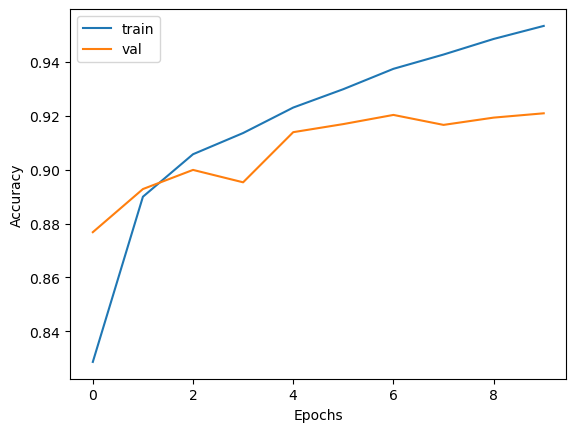

In [18]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

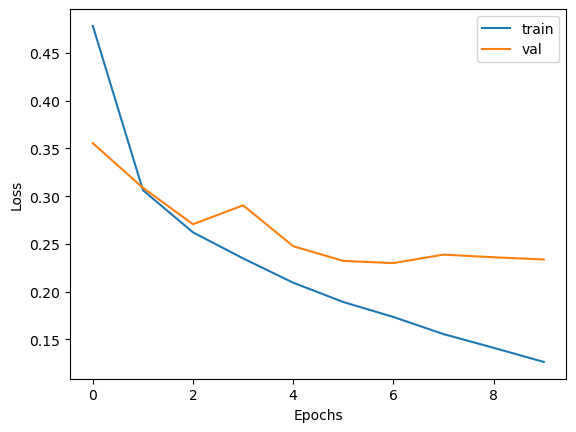

In [19]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2337 - accuracy: 0.9209
Test accuracy: 0.9208999872207642
